<a href="https://colab.research.google.com/github/Fazel-AVB/single-cell_omics/blob/main/foundation_models_in_sc/single_cell_annotation_LLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import os
# import sys
# from google.colab import drive
# drive.mount('/content/drive')
# package_path = '/content/packages'
# os.symlink('/package/drive/My Drive/Packages', package_path)
# sys.path.insert(0, package_path)

### 1) Installed required packages

In [3]:
install.packages("remotes")
install.packages("Seurat")
remotes::install_github("satijalab/seurat-data")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘spatstat.random’, ‘plotly’, ‘ROCR’, ‘sctransform’, ‘spatstat.explore’, ‘spatstat.geom’, ‘uwot’





cli (3.6.3 -> 3.6.4) [CRAN]


Installing 1 packages: cli

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpBjT68o/remotes4c5e72f437bc/satijalab-seurat-data-4dc08e0/DESCRIPTION’ ... OK
* preparing ‘SeuratData’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘SeuratData_0.2.2.9001.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### 2) Load packages

In [1]:
library(tidyverse)
library(Seurat)
library(SeuratData)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


ERROR: Error in library(Seurat): there is no package called ‘Seurat’


In [ ]:
InstallData("pbmc3k")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
set.seed(42)
pbmc <- SeuratData::LoadData("pbmc3k")

Validating object structure

Updating object slots

Ensuring keys are in the proper structure

Warning message:
“Assay RNA changing from Assay to Assay”
Ensuring keys are in the proper structure

Ensuring feature names don't have underscores or pipes

Updating slots in RNA

Validating object structure for Assay ‘RNA’

Object representation is consistent with the most current Seurat version

Warning message:
“Assay RNA changing from Assay to Assay5”


In [ ]:
pbmc <- NormalizeData(pbmc, normalization.method = "LogNormalize", scale.factor = 10000)


Normalizing layer: counts



In [ ]:
pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)


Finding variable features for layer counts



In [ ]:
pbmc <- ScaleData(pbmc, features = rownames(pbmc))


Centering and scaling data matrix



In [ ]:
pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))


PC_ 1 
Positive:  MALAT1, LTB, IL32, CD2, ACAP1, STK17A, CTSW, CD247, CCL5, GIMAP5 
	   AQP3, GZMA, CST7, TRAF3IP3, MAL, HOPX, ITM2A, GZMK, MYC, BEX2 
	   GIMAP7, ETS1, LDLRAP1, ZAP70, LYAR, RIC3, TNFAIP8, KLRG1, SAMD3, NKG7 
Negative:  CST3, TYROBP, LST1, AIF1, FTL, FCN1, LYZ, FTH1, S100A9, FCER1G 
	   TYMP, CFD, LGALS1, CTSS, S100A8, SERPINA1, LGALS2, SPI1, IFITM3, PSAP 
	   CFP, SAT1, IFI30, COTL1, S100A11, NPC2, LGALS3, GSTP1, PYCARD, NCF2 
PC_ 2 
Positive:  CD79A, MS4A1, TCL1A, HLA-DQA1, HLA-DRA, HLA-DQB1, LINC00926, CD79B, HLA-DRB1, CD74 
	   HLA-DPB1, HLA-DMA, HLA-DQA2, HLA-DRB5, HLA-DPA1, HLA-DMB, FCRLA, HVCN1, LTB, BLNK 
	   KIAA0125, P2RX5, IRF8, IGLL5, SWAP70, ARHGAP24, SMIM14, PPP1R14A, FCRL2, C16orf74 
Negative:  NKG7, PRF1, CST7, GZMA, GZMB, FGFBP2, CTSW, GNLY, GZMH, SPON2 
	   CCL4, FCGR3A, CCL5, CD247, XCL2, CLIC3, AKR1C3, SRGN, HOPX, CTSC 
	   TTC38, S100A4, ANXA1, IL32, IGFBP7, ID2, ACTB, XCL1, APOBEC3G, SAMD3 
PC_ 3 
Positive:  HLA-DQA1, CD79A, CD79B, HLA-DQB1, HLA-D

In [ ]:
pbmc <- FindNeighbors(pbmc, dims = 1:10)


Computing nearest neighbor graph

Computing SNN



In [ ]:
pbmc <- FindClusters(pbmc, resolution = 0.5)


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2700
Number of edges: 97892

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8719
Number of communities: 9
Elapsed time: 0 seconds


In [ ]:
pbmc <- RunUMAP(pbmc, dims = 1:10)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
00:37:16 UMAP embedding parameters a = 0.9922 b = 1.112

00:37:16 Read 2700 rows and found 10 numeric columns

00:37:16 Using Annoy for neighbor search, n_neighbors = 30

00:37:16 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

00:37:16 Writing NN index file to temp file /tmp/RtmpcV5hmG/file28f73a3c3c5f

00:37:16 Searching Annoy index using 1 thread, search_k = 3000

00:37:18 Annoy recall = 100%

00:37:18 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors =

In [ ]:
# find markers for every cluster compared to all remaining cells, report only the positive
# ones
pbmc.markers <- FindAllMarkers(pbmc, only.pos = TRUE)

Calculating cluster 0

For a (much!) faster implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the presto package
--------------------------------------------
install.packages('devtools')
devtools::install_github('immunogenomics/presto')
--------------------------------------------
After installation of presto, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8



In [ ]:
pbmc.markers %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 1)

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
3.035655e-104,1.109807,0.895,0.592,4.163098e-100,0,LDHB
1.101828e-81,2.347425,0.432,0.111,1.511047e-77,0,CCR7
4.196433e-79,1.097449,0.848,0.407,5.754989e-75,0,CD3D
2.525233e-48,2.117384,0.336,0.108,3.463104e-44,0,PRKCQ-AS1
1.395562e-47,1.211384,0.625,0.358,1.913874e-43,0,NOSIP
3.989522e-41,1.930159,0.316,0.109,5.471230e-37,0,LEF1
5.754748e-37,1.372734,0.420,0.188,7.892062e-33,0,PIK3IP1
1.118578e-32,2.418953,0.185,0.045,1.534018e-28,0,FHIT
3.669318e-32,1.883414,0.259,0.087,5.032102e-28,0,MAL


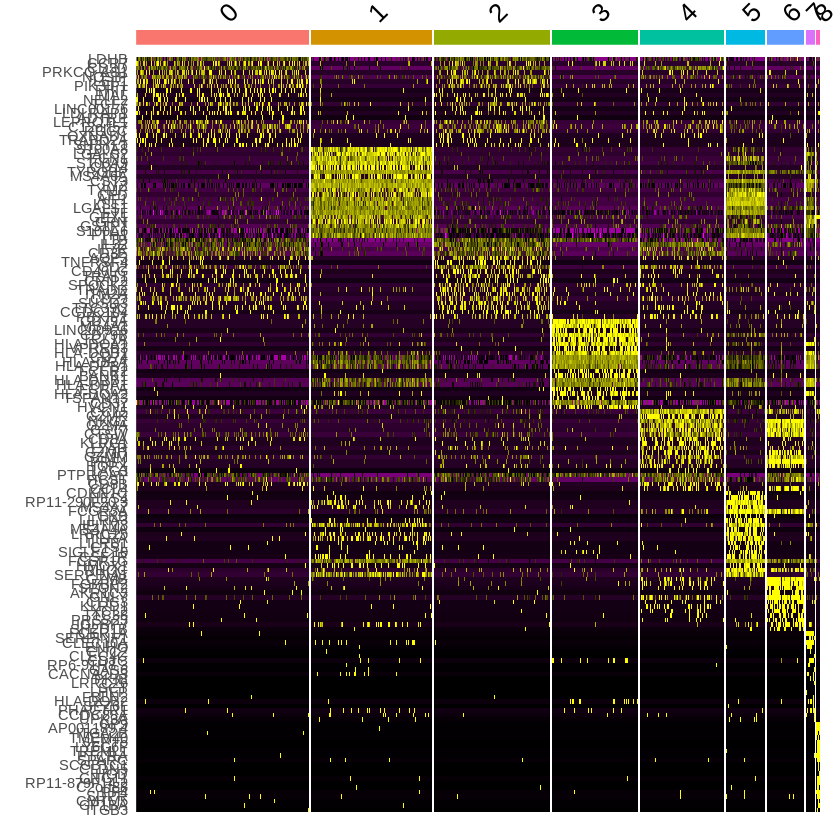

In [ ]:
pbmc.markers %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 1) %>%
    slice_head(n = 20) %>%
    ungroup() -> top10

DoHeatmap(pbmc, features = top10$gene) + NoLegend()

In [ ]:
top10

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
3.035655e-104,1.109807,0.895,0.592,4.163098e-100,0,LDHB
1.101828e-81,2.347425,0.432,0.111,1.511047e-77,0,CCR7
4.196433e-79,1.097449,0.848,0.407,5.754989e-75,0,CD3D
2.525233e-48,2.117384,0.336,0.108,3.463104e-44,0,PRKCQ-AS1
1.395562e-47,1.211384,0.625,0.358,1.913874e-43,0,NOSIP
3.989522e-41,1.930159,0.316,0.109,5.471230e-37,0,LEF1
5.754748e-37,1.372734,0.420,0.188,7.892062e-33,0,PIK3IP1
1.118578e-32,2.418953,0.185,0.045,1.534018e-28,0,FHIT
3.669318e-32,1.883414,0.259,0.087,5.032102e-28,0,MAL


In [ ]:
# user_api_key <- "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"
user_api_key <- "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"

In [ ]:
# Load necessary libraries
library(httr)
library(jsonlite)

In [ ]:
# Define the function ask_llm that takes a prompt and a model choice as input.
Chatbot <- function(model_choice = "gpt3", user_question, api_key = user_api_key) {
  # Map the model choice to the corresponding model identifier
  if (model_choice == "gpt3") {
    model <- "openai/gpt-3.5-turbo"
  } else if (model_choice == "gpt4") {
    model <- "openai/gpt-4o-2024-11-20"
  } else if (model_choice == "deepseek") {
    model <- "deepseek/deepseek-r1"
  } else if (model_choice == "claude") {
    model <- "anthropic/claude-3.5-sonnet-20240620"
  } else {
    stop("Invalid model choice. Please choose 'gpt3', 'gpt4', 'deepseek', or 'claude'.")
  }

  # Define the API endpoint and your API key (replace with your actual API key)
  url <- "https://openrouter.ai/api/v1/chat/completions"

  # Create the JSON payload for the POST request
  payload <- list(
    model = model,
    messages = list(
      list(
        role = "user",
        content = user_question
      )
    )
  )

  # Convert the payload to JSON
  payload_json <- toJSON(payload, auto_unbox = TRUE)

  # Send the POST request to the API
  response <- POST(
    url,
    add_headers(
      Authorization = paste("Bearer", api_key),
      "Content-Type" = "application/json"
    ),
    body = payload_json
  )

  # Check for errors in the API response
  if (status_code(response) != 200) {
    stop("Error: Received status code ", status_code(response), "\n", content(response, "text"))
  }

  # Parse the JSON response
  result <- content(response, "parsed")

  # Return the chatbot's reply
  return(result$choices[[1]]$message$content)
}

# Example usage of the function:
answer <- Chatbot("claude", "What is better, Seurat or Scanpy?")
cat("Answer:", answer)

Answer: It's difficult to say definitively whether Seurat or Scanpy is "better," as both are powerful and widely-used tools for single-cell RNA sequencing (scRNA-seq) analysis. The choice between them often depends on the specific needs of your project, your programming language preference, and your familiarity with the tools. Here's a comparison of some key aspects:

Seurat:
1. Developed in R
2. Extensive documentation and large user community
3. Well-established workflow for scRNA-seq analysis
4. Strong visualization capabilities
5. Integrates well with other R packages

Scanpy:
1. Developed in Python
2. Fast and memory-efficient
3. Good for large datasets
4. Integrates well with machine learning libraries in Python
5. Supports anndata format, which is becoming a standard in the field

Considerations:

1. Programming language: If you're more comfortable with R, Seurat might be easier to use. If you prefer Python, Scanpy would be a better choice.

2. Dataset size: Scanpy is generally 

In [ ]:
AnnotationWrapper <- function() {
  llm_annotations <- lapply(unique(top10$cluster), function(i) {
  curr_terms <- dplyr::filter(top10, cluster == i) %>%
    dplyr::select(avg_log2FC, gene) %>%
    as.data.frame()

  # Make the output into a string that can be fed into a LLM
  curr_terms <- format(curr_terms, row.names = FALSE)
  curr_terms <- paste(curr_terms, collapse = "\n")

  # Build the prompt. Feel free to adjust the wording as needed.
  prompt <- paste(
    "Given the following top 10 differentially expressed genes for a given cluster and their average log2 fold change in comparison to their expression in not that cluster, please provide your best guess as to what the cell type is. Don't provide details. Just respond with the name. Nothing else. If you can be more specific (eg. CD4 T cells as opposed to T cells) then please do. The data are as follows:",
    curr_terms
  )

  result <- Chatbot("claude", shQuote(prompt))
  return(result)
  }) %>% unlist()

  return(llm_annotations)
}

llm_annotations <- AnnotationWrapper()

In [ ]:
reference <- data.frame(
  old_cluster_id = c(0, 1, 2, 3, 4, 5, 6, 7, 8),
  markers = I(list( c("IL7R","CCR7"),
                    c("CD14","LYZ"),
                    c("IL7R","S100A4"),
                    c("MS4A1"),
                    c("CD8A"),
                    c("FCGR3A","MS4A7"),
                    c("GNLY","NKG7"),
                    c("FCER1A","CST3"),
                    c("PPBP")
                 )),
  cell_type = c("Naive CD4+ T","CD14+ Mono","Memory CD4+ T","B","CD8+ T",
                "FCGR3A+ Mono","NK","DC","Platelet")
)

reference$llm_cell_type <- llm_annotations
reference

old_cluster_id,markers,cell_type,llm_cell_type
<dbl>,<I<list>>,<chr>,<chr>
0,"IL7R, CCR7",Naive CD4+ T,CD4 T cells
1,"CD14, LYZ",CD14+ Mono,Monocytes
2,"IL7R, S100A4",Memory CD4+ T,CD4+ T cells
3,MS4A1,B,B cells
4,CD8A,CD8+ T,CD8+ T cells
5,"FCGR3A, ....",FCGR3A+ Mono,Monocytes
6,"GNLY, NKG7",NK,NK cells
7,"FCER1A, CST3",DC,Dendritic cells
8,PPBP,Platelet,Platelets


In [ ]:
annotation_compare <- lapply(1:3, function(i) {
  result <- AnnotationWrapper()
  return(result)
}) %>% do.call(cbind, .) %>% as_tibble()

Warning message:
“The `x` argument of `as_tibble.matrix()` must have unique column names if
`.name_repair` is omitted as of tibble 2.0.0.
ℹ Using compatibility `.name_repair`.”


In [ ]:
annotation_compare

V1,V2,V3
<chr>,<chr>,<chr>
Naive CD4 T cells,CD4 T cells,CD4 T cells
Monocytes,Monocytes,Monocytes
CD4+ T cells,CD4 T cells,CD4 T cells
B cells,B cells,B cells
CD8 T cells,CD8+ T cells,CD8+ T cells
Monocytes,Monocytes,Monocytes
Natural killer cells,NK cells,NK cells
Dendritic cells,Dendritic cells,Dendritic cells
Platelets,Platelets,Megakaryocytes


In [ ]:
# Make sure to convert the cluster numbers to character if necessary:
pbmc@meta.data$llm_annotation <- reference$llm_cell_type[pbmc@meta.data$seurat_clusters]

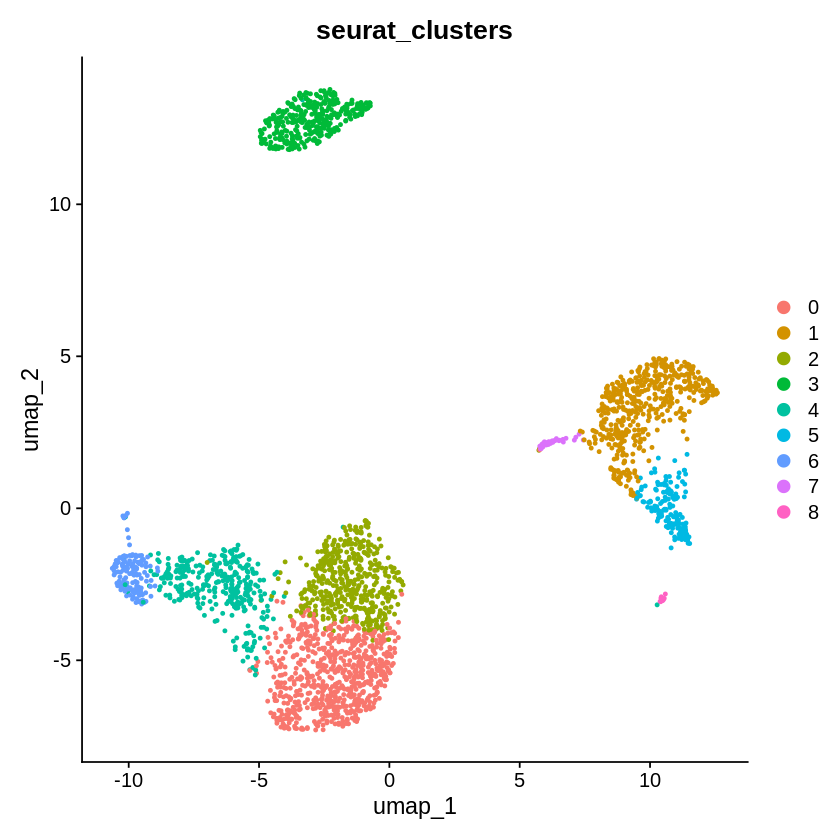

In [ ]:
DimPlot(pbmc, group.by = "seurat_clusters")

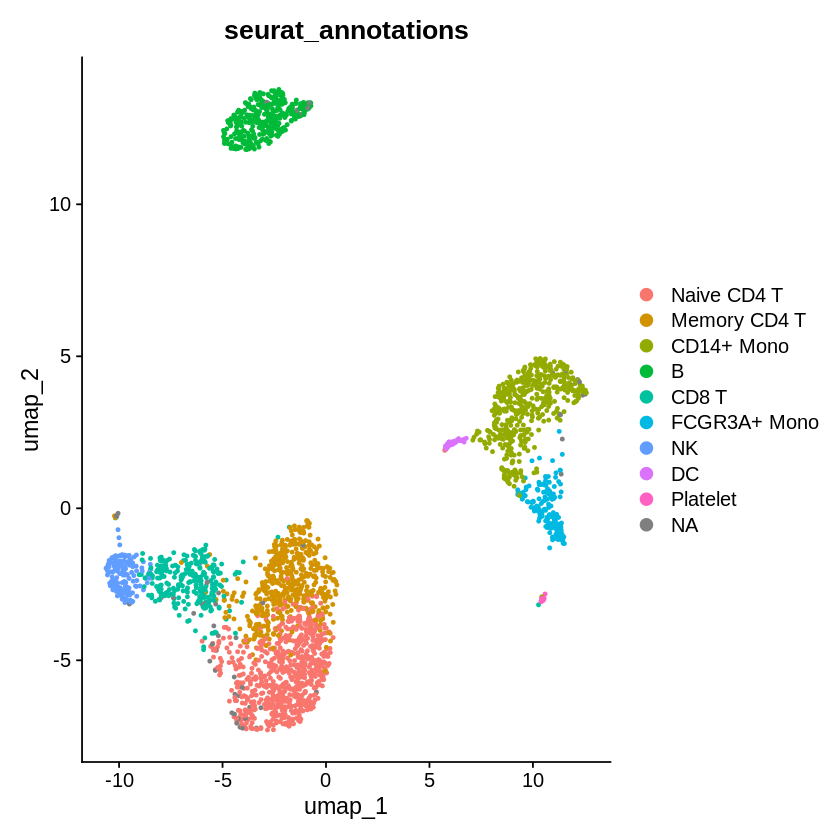

In [ ]:
DimPlot(pbmc, group.by = "seurat_annotations")

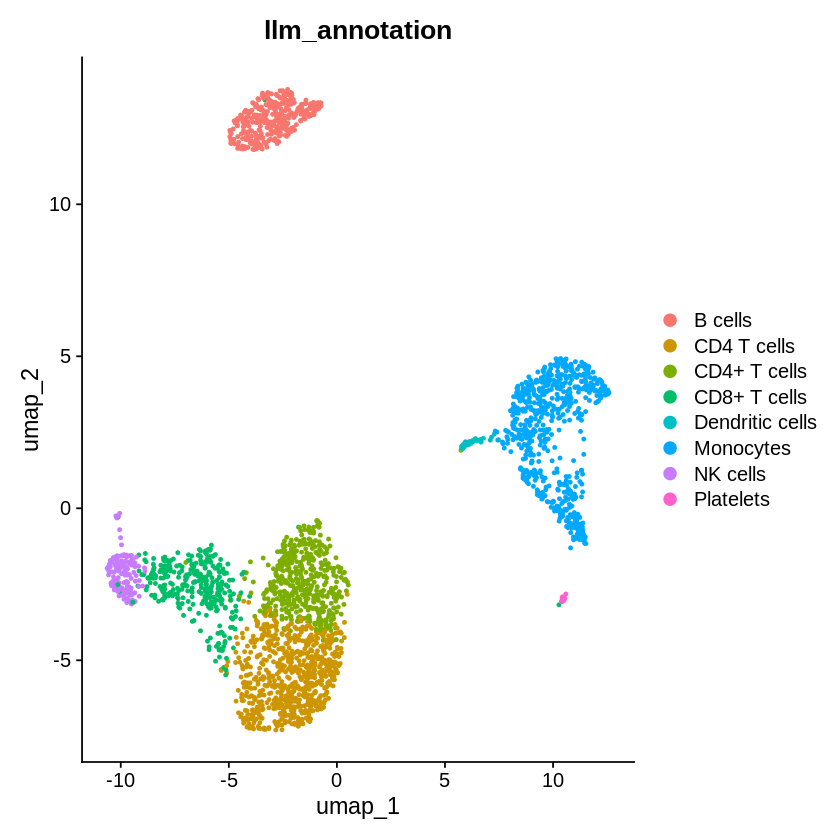

In [ ]:
DimPlot(pbmc, group.by = "llm_annotation")

In [ ]:
p <- DimPlot(pbmc, group.by = "seurat_annotations")
p_build <- ggplot_build(p)

 # This prints out details including scale information:
print(p_build$plot$scales$scales[[1]]$palette.cache)

[1] "#F8766D" "#D39200" "#93AA00" "#00BA38" "#00C19F" "#00B9E3" "#619CFF"
[8] "#DB72FB" "#FF61C3"


In [ ]:
# Define a custom color palette for the unique cell types
custom_colors <- c(
  "CD4 T cells"    = "#F8766D",
  "Monocytes"      = "#93AA00",
  "CD4+ T cells"   = "#F8766D",
  "B cells"        = "#00BA38",
  "CD8+ T cells"   = "#00C19F",
  "NK cells"       = "#619CFF",
  "Dendritic cells"= "#DB72FB",
  "Platelets"      = "#FF61C3"
)

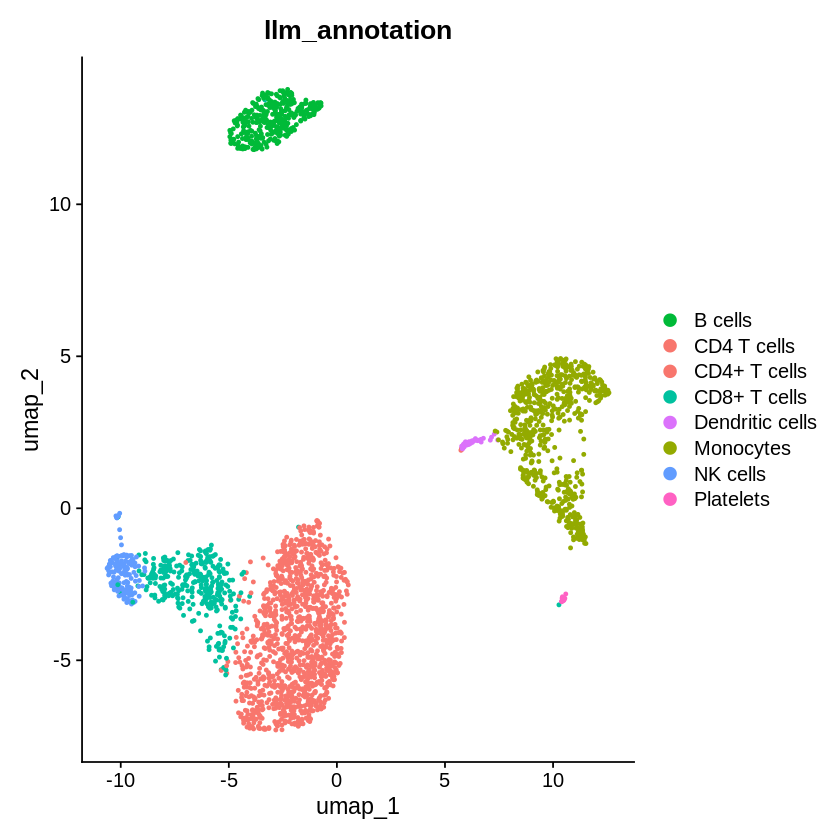

In [ ]:
DimPlot(pbmc, group.by = "llm_annotation", cols = custom_colors)